**Final Project - Banking Marketing Targets**

Stage 2 : Data Pre-Processing

Team : **Group 13 (Data Legion)**

Mentor : Kevin

Team Member :
- *Sayyid Abdurrabbi*
- *Muthmainah*
- *Aryan Noor*
- *Dicky Pratama*
- *Wafi Hanan*
- *Maisya Sabrina*
- *Nadila Nurul Jelita*
- *Erfan Muhammad Rahmawan*

About Dataset

The The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [190]:
df = pd.read_csv('/content/drive/My Drive/FinPro - Rakamin Academy/Train - Banking Marketing Targets.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [191]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Nama kolom dan tipe data sudah sesuai, 

**A. Handling Missing Value / Unknown Value**

In [193]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Tidak terdapat nilai kosong (NaN) pada dataset ini.

In [194]:
cats = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
nums = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

Terdapat *unknown value* pada fitur job, education dan contact.


In [195]:
unknown_values = ["unknown"]
data_checkna = pd.read_csv('/content/drive/My Drive/FinPro - Rakamin Academy/Train - Banking Marketing Targets.csv', na_values = unknown_values)

In [138]:
print(data_checkna.isna().sum())

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


Solusi untuk *unknown value* pada fiture job, education, & contact adalah dengan mengganti *unknown value* menjadi nilai terbanyak (modus). Pertimbangan ingin dikarenakan *unknown value* pada fitur cukup banyak terutama pada fitur contact yaitu 28.80% dari total kolom.

*Sedangkan ***unknown value*** pada pada fitur poutcome merupakan nilai dari poutcome itu sendiri dimana sebelumnya belum pernah melakukan kampanye telepon.* 

In [196]:
df["job"].replace(["unknown"],df["job"].mode(),inplace = True)
df["education"].replace(["unknown"],df["education"].mode(),inplace = True)
df["contact"].replace(["unknown"],df["contact"].mode(),inplace = True)

In [197]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [198]:
df['education'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [199]:
df['contact'].value_counts()

cellular     42305
telephone     2906
Name: contact, dtype: int64

**B. Handle Duplicated Data**

In [200]:
print(df.duplicated().value_counts())
print(df.duplicated().sum())

False    45211
dtype: int64
0


Tidak terdapat duplikasi data.

**C. Handle Outliers**

In [201]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    zscore = abs(stats.zscore(df[col]))
    filtered = (zscore < 3)
df_filtered = df[filtered]

print(f'Jumlah baris setelah memfilter outlier: {len(df_filtered)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 44629


**E. Log Transformation**

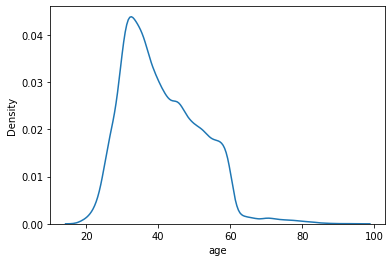

In [166]:
sns.kdeplot(df_filtered['age'])
plt.show()

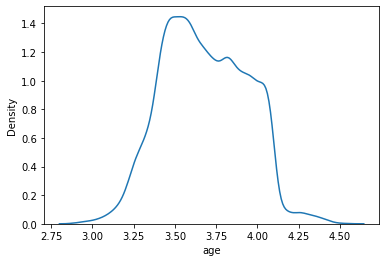

In [167]:
#Log Transformation

sns.kdeplot(np.log(df_filtered['age']))
plt.show()

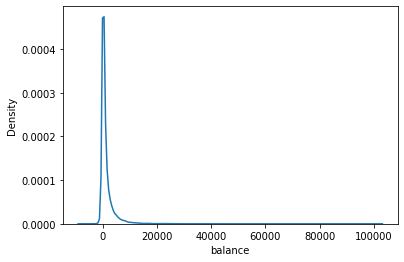

In [168]:
sns.kdeplot(df_filtered['balance'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


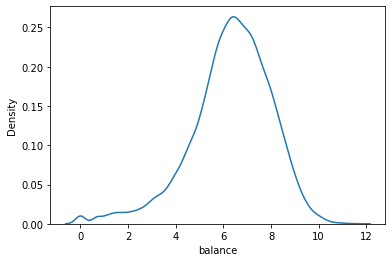

In [169]:
#Log Transformation

sns.kdeplot(np.log(df_filtered['balance']))
plt.show()

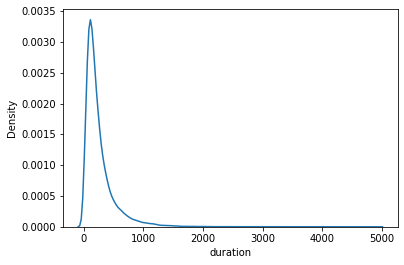

In [170]:
sns.kdeplot(df_filtered['duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


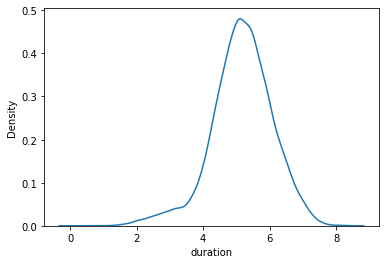

In [171]:
sns.kdeplot(np.log(df_filtered['duration']))
plt.show()

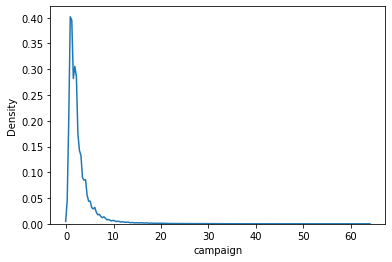

In [172]:
sns.kdeplot(df_filtered['campaign'])
plt.show()

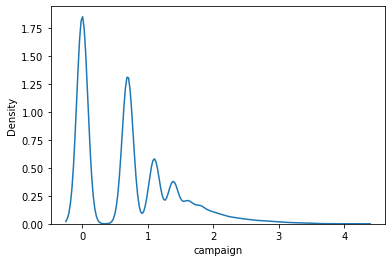

In [173]:
sns.kdeplot(np.log(df_filtered['campaign']))
plt.show()

Setelah diakukan log transformation, grafik distribusi fitur ... menjadi mendekati distribusi normal.

**D. Feature Transformation**

In [174]:
# Standarisasi
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_filtered['age'] = StandardScaler().fit_transform(df_filtered['age'].values.reshape(len(df_filtered), 1))
df_filtered['balance'] = StandardScaler().fit_transform(df_filtered['balance'].values.reshape(len(df_filtered), 1))
df_filtered['duration'] = StandardScaler().fit_transform(df_filtered['duration'].values.reshape(len(df_filtered), 1))
df_filtered['campaign'] = StandardScaler().fit_transform(df_filtered['campaign'].values.reshape(len(df_filtered), 1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [175]:
df_filtered[['age', 'balance', 'duration','campaign']].describe()

,age,balance,duration,campaign
count,4.462900e+04,4.462900e+04,4.462900e+04,4.462900e+04
mean,-1.069898e-16,-2.547376e-17,-2.929482e-17,7.132652e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.162732e+00,-3.075319e+00,-1.001949e+00,-5.671778e-01
25%,-7.482392e-01,-4.226769e-01,-6.023518e-01,-5.671778e-01
50%,-1.824419e-01,-2.997176e-01,-3.036241e-01,-2.454745e-01
75%,6.662540e-01,1.964870e-02,2.356376e-01,7.622874e-02
max,5.098333e+00,3.304062e+01,1.807783e+01,1.937843e+01


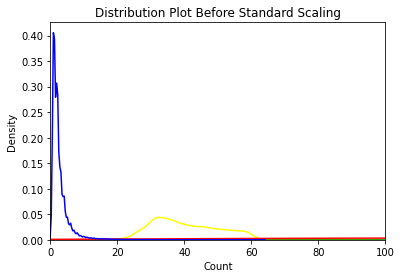

In [176]:
fig, ax = plt.subplots()
sns.kdeplot(df['age'], ax=ax, color ='yellow')
sns.kdeplot(df['balance'], ax=ax, color ='green')
sns.kdeplot(df['duration'], ax=ax, color ='red')
sns.kdeplot(df['campaign'], ax=ax, color ='blue')
ax.set_xlim(0,100)
ax.set_title('Distribution Plot Before Standard Scaling')
plt.xlabel('Count')
plt.show()

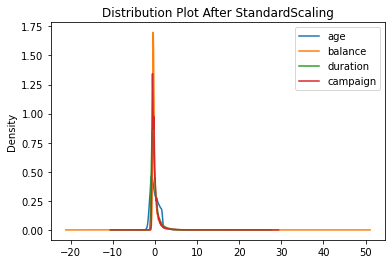

In [177]:
df_1 = df_filtered[['age', 'balance', 'duration', 'campaign']]
ax = df_1.plot.kde()
ax.set_title('Distribution Plot After StandardScaling')
plt.show()

**F. Feature Encoding**

**Label Encoding**

In [178]:
df_filtered['marital'] = df_filtered['marital'].astype('category').cat.codes
df_filtered['education'] = df_filtered['education'].astype('category').cat.codes
df_filtered['default'] = df_filtered['default'].astype('category').cat.codes
df_filtered['housing'] = df_filtered['housing'].astype('category').cat.codes
df_filtered['loan'] = df_filtered['loan'].astype('category').cat.codes
df_filtered['contact'] = df_filtered['contact'].astype('category').cat.codes
df_filtered['poutcome'] = df_filtered['poutcome'].astype('category').cat.codes
df_filtered['y'] = df_filtered['y'].astype('category').cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [179]:
df_filtered.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.609249,management,1,2,0,0.256714,1,0,0,5,may,0.010622,-0.567178,-1,0,3,0
1,0.289056,technician,2,1,0,-0.436448,1,0,0,5,may,-0.416132,-0.567178,-1,0,3,0
2,-0.748239,entrepreneur,1,1,0,-0.445301,1,1,0,5,may,-0.707101,-0.567178,-1,0,3,0


Value yang sebelumnya berjenis kategorik pada fitur ..., telah ter-encode menjadi numerik.

**One-hot Encoding**

In [180]:
df_job = pd.get_dummies(df_filtered['job'], prefix='job')
df_month = pd.get_dummies(df_filtered['month'], prefix='month')
df = df_filtered.join(df_job)
df = df.join(df_month)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.609249,management,1,2,0,0.256714,1,0,0,5,...,0,0,0,0,0,0,1,0,0,0
1,0.289056,technician,2,1,0,-0.436448,1,0,0,5,...,0,0,0,0,0,0,1,0,0,0
2,-0.748239,entrepreneur,1,1,0,-0.445301,1,1,0,5,...,0,0,0,0,0,0,1,0,0,0


In [181]:
df_drop_copy = df.drop(columns=['job','month']).copy()
df_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44629 entries, 0 to 45209
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44629 non-null  float64
 1   marital            44629 non-null  int8   
 2   education          44629 non-null  int8   
 3   default            44629 non-null  int8   
 4   balance            44629 non-null  float64
 5   housing            44629 non-null  int8   
 6   loan               44629 non-null  int8   
 7   contact            44629 non-null  int8   
 8   day                44629 non-null  int64  
 9   duration           44629 non-null  float64
 10  campaign           44629 non-null  float64
 11  pdays              44629 non-null  int64  
 12  previous           44629 non-null  int64  
 13  poutcome           44629 non-null  int8   
 14  y                  44629 non-null  int8   
 15  job_admin.         44629 non-null  uint8  
 16  job_blue-collar    446

**G. Checking Redundant**

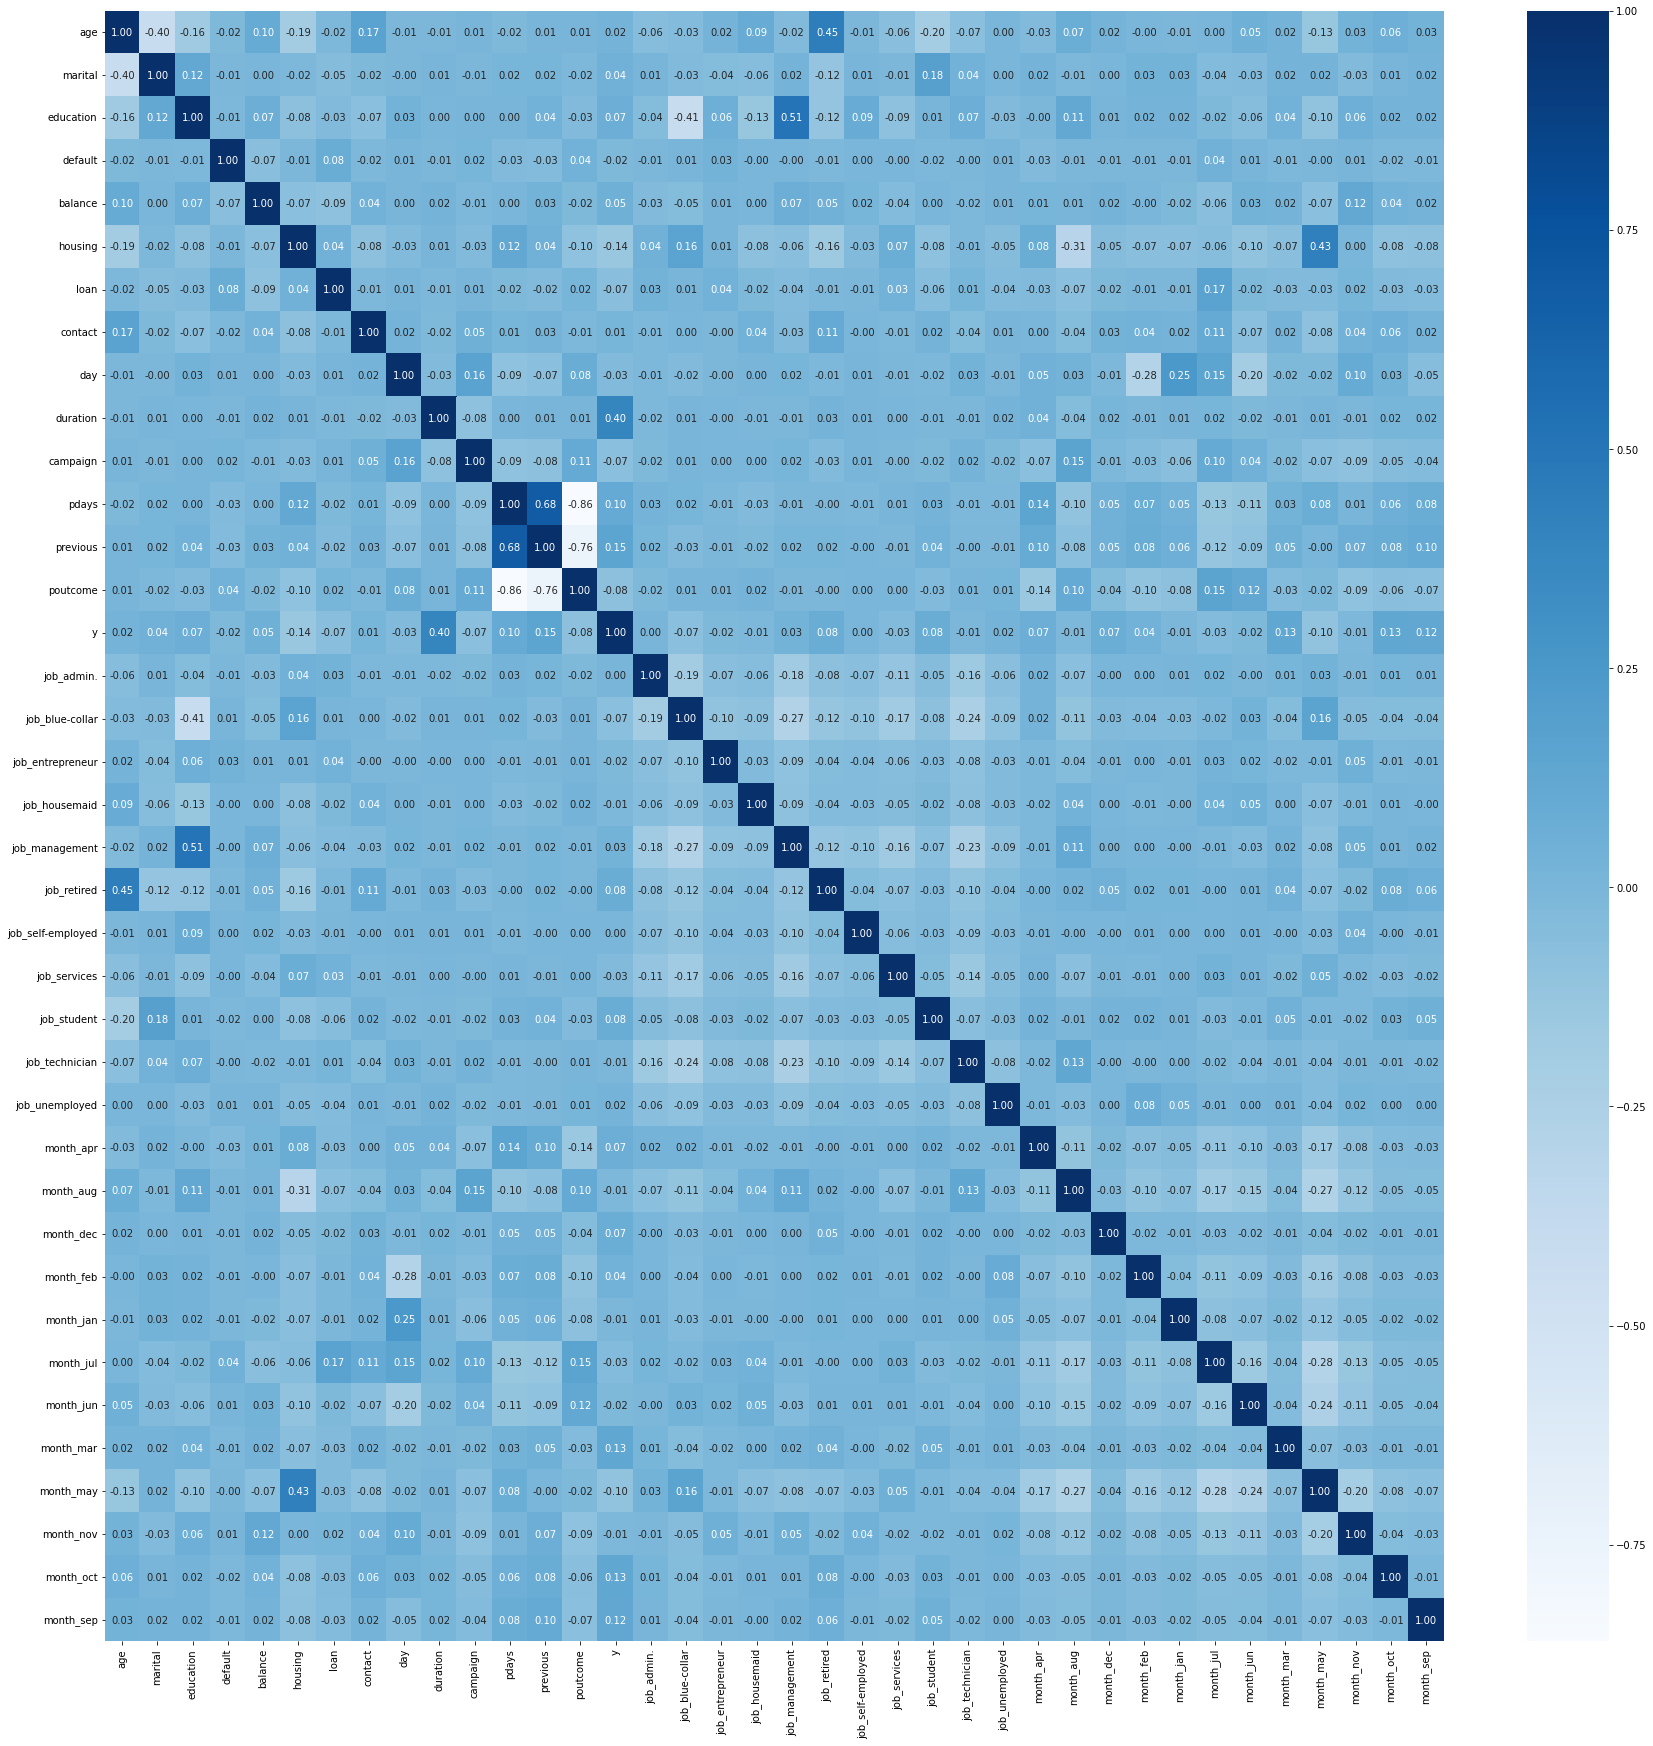

In [182]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_drop_copy.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Terdapat Redundant setelah penambahan fitur dari ekstraksi job & month dimana nilai dari korelasinya pada kedua fiture tersebut sama yaitu fiture **pdays & previous**.

**H. Drop Feature (Rendundant / Low Correlation)**

In [183]:
df_drop = df_drop_copy.drop(columns=['pdays','previous'])
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44629 entries, 0 to 45209
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44629 non-null  float64
 1   marital            44629 non-null  int8   
 2   education          44629 non-null  int8   
 3   default            44629 non-null  int8   
 4   balance            44629 non-null  float64
 5   housing            44629 non-null  int8   
 6   loan               44629 non-null  int8   
 7   contact            44629 non-null  int8   
 8   day                44629 non-null  int64  
 9   duration           44629 non-null  float64
 10  campaign           44629 non-null  float64
 11  poutcome           44629 non-null  int8   
 12  y                  44629 non-null  int8   
 13  job_admin.         44629 non-null  uint8  
 14  job_blue-collar    44629 non-null  uint8  
 15  job_entrepreneur   44629 non-null  uint8  
 16  job_housemaid      446

**I. Class Imbalanced**

In [184]:
x = df_drop
y = df_drop['y'].values

In [185]:
df['y_class'] = df['y'] == 1
print(df['y_class'].value_counts())

False    39483
True      5146
Name: y_class, dtype: int64


In [186]:
x = df[[col for col in df.columns if col not in ['y_class', 'y']]].values
y = df['y_class'].values
print(x.shape)
print(y.shape)

(44629, 39)
(44629,)


In [187]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

under_sample = RandomUnderSampler(random_state=42, replacement=True)  #fit predictor and target variable
x_under, y_under = under_sample.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset', Counter(y_under))

Original dataset: Counter({False: 39483, True: 5146})
Resample dataset Counter({False: 5146, True: 5146})
